# MTF and Linearity

In [1]:
!python3 --version
import sys
sys.path

Python 3.7.10


['/Users/ajpfahnl/Google Drive/__Kadambi/MTF',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.702919634/pythonFiles',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.702919634/pythonFiles',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.702919634/pythonFiles/lib/python',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python37.zip',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/lib-dynload',
 '',
 '/Users/ajpfahnl/.local/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/IPython/extensions',
 '/Users/ajpfahnl/.ipython']

In [171]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rawpy
import numpy as np
import math
from scipy.fft import fft
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

%load_ext autoreload
%autoreload 2

from MTF import MTF
from ImgLinearity import ImgLinearity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(4020, 6024, 3) (4000, 6000, 3)


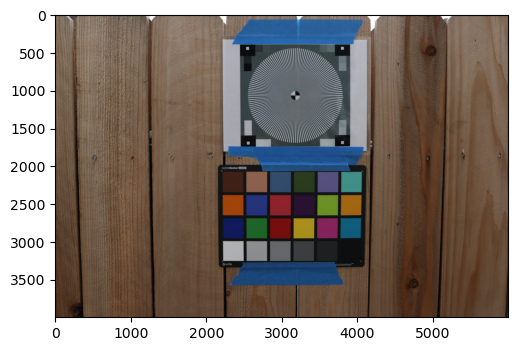

In [173]:
img_dir = "../WeatherNet/dataset2/800/"
with rawpy.imread(img_dir + "IMG_2581.CR2") as raw:
    image_raw_orig = raw.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)
    image_raw_orig_8 = raw.postprocess(gamma=(1,1), no_auto_bright=True)
image_orig =  mpimg.imread(img_dir + "IMG_2581.JPG")
print(image_raw_orig.shape, image_orig.shape)
plt.imshow(image_orig)

(1344, 1457)
7.668421052631579 pixels per millimeter
36 cycles per quadrant


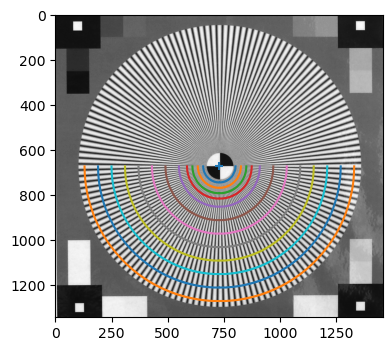

In [157]:
image = cv2.cvtColor(image_orig,cv2.COLOR_BGR2GRAY)
image = image[394:1738, 2451:3908]; params = ((0, 2) , 2.4)
img_MTF = MTF(image, *params)
img_MTF.find_arcs()
img_MTF.display_arcs()


(1344, 1457)
7.668421052631579 pixels per millimeter
36 cycles per quadrant


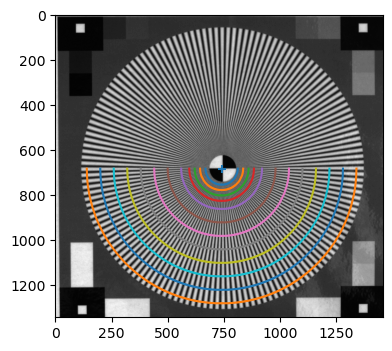

In [158]:
image_raw = cv2.cvtColor(image_raw_orig,cv2.COLOR_BGR2GRAY)
# params_IMG_2551_raw = (1450, 2600, 850, 750, 400, 430, 1.2)
# params_IMG_2580_raw = (400, 2400, 1600, 1400, (2+10, 25+10) , 2.5)
image_raw = image_raw[394:1738, 2451:3908]

img_raw_MTF = MTF(image_raw, *params, raw=True)
img_raw_MTF.find_arcs()
img_raw_MTF.display_arcs()

In [114]:
print("Cycles per millimeter")
print(img_MTF.freqs)
print(img_MTF.freqs_orig)

Cycles per millimeter
[9.763736929890168, 7.322802697417626, 5.858242157934101, 4.881868464945084, 3.9054947719560675, 2.9291210789670505, 2.3432968631736406, 1.9527473859780338, 1.6737834736954575, 1.4645605394835253, 1.3018315906520226, 1.1716484315868203]
[0.15915494309189535, 0.1193662073189215, 0.09549296585513721, 0.07957747154594767, 0.06366197723675814, 0.047746482927568605, 0.038197186342054885, 0.03183098861837907, 0.0272837045300392, 0.023873241463784303, 0.02122065907891938, 0.019098593171027443]


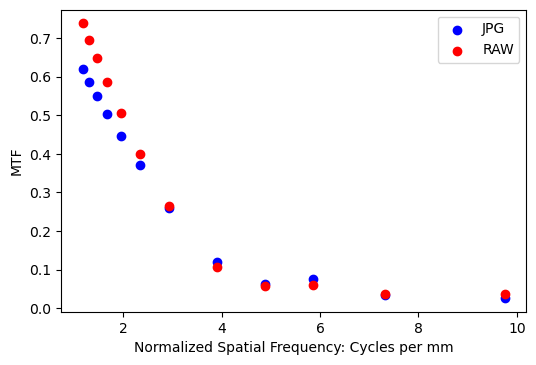

In [159]:
mtfs = img_MTF.arcvals_to_mtfs()
mtfs_raw = img_raw_MTF.arcvals_to_mtfs()
freqs = img_MTF.freqs
plt.scatter(freqs, mtfs, color='b', label="JPG")
plt.scatter(freqs, mtfs_raw, color='r', label="RAW")
plt.ylabel("MTF")
plt.xlabel("Normalized Spatial Frequency: Cycles per mm")
plt.legend()

Text(0.5, 0, 'Normalized Spatial Frequency: Cycles per mm')

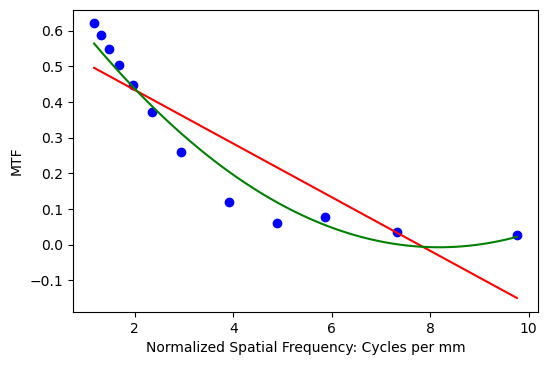

In [160]:
freqs = np.asarray(freqs)
mtfs = np.asarray(mtfs)
reg = LinearRegression().fit(freqs[:, np.newaxis], mtfs)
mtfs_predlinear = reg.predict(freqs[:, np.newaxis])

polymodel = make_pipeline(PolynomialFeatures(2), Ridge())
polymodel.fit(freqs[:, np.newaxis], mtfs)
x_plot = np.linspace(freqs[0], freqs[-1], 100)
mtfs_predquad = polymodel.predict(x_plot[:, np.newaxis])

plt.scatter(freqs, mtfs, color='b')
plt.plot(freqs, mtfs_predlinear, color='r', label='linear')
plt.plot(x_plot, mtfs_predquad, color='g', label='quad')
plt.ylabel("MTF")
plt.xlabel("Normalized Spatial Frequency: Cycles per mm")

(4000, 6000, 3)


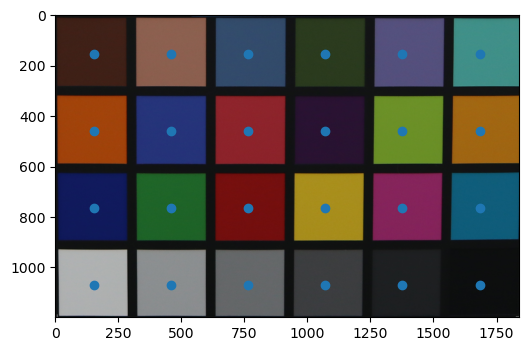

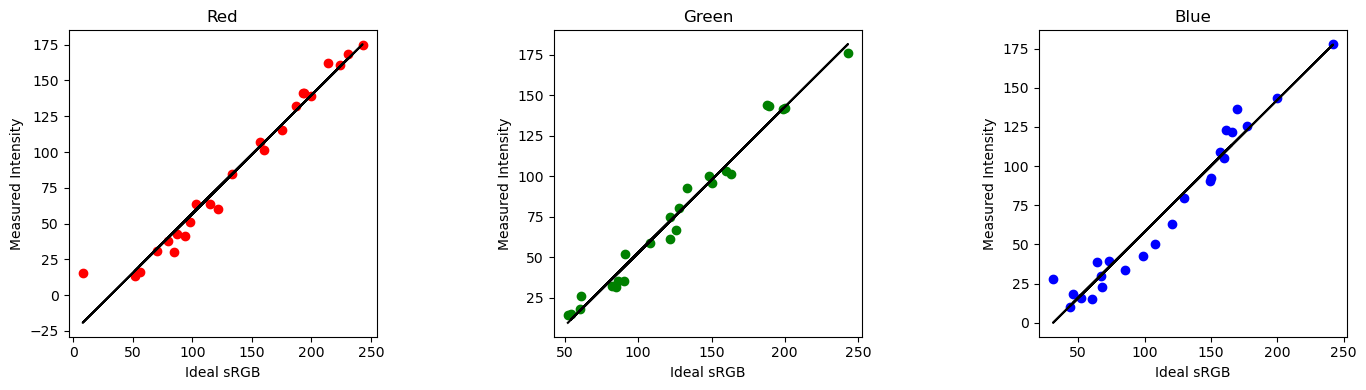

In [166]:
img_color = image_orig
print(img_color.shape)
img_color = img_color[2064:3262, 2212:4051, :]
plt.imshow(img_color)
iml = ImgLinearity(img_color)
plt.scatter(iml.target_locs[:, 0], iml.target_locs[:, 1])
iml.extract_actual(box=20)
iml.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(4020, 6024, 3) uint16


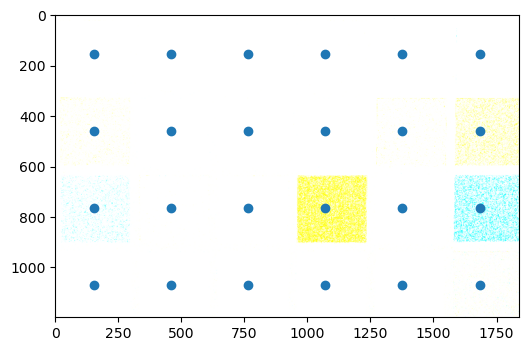

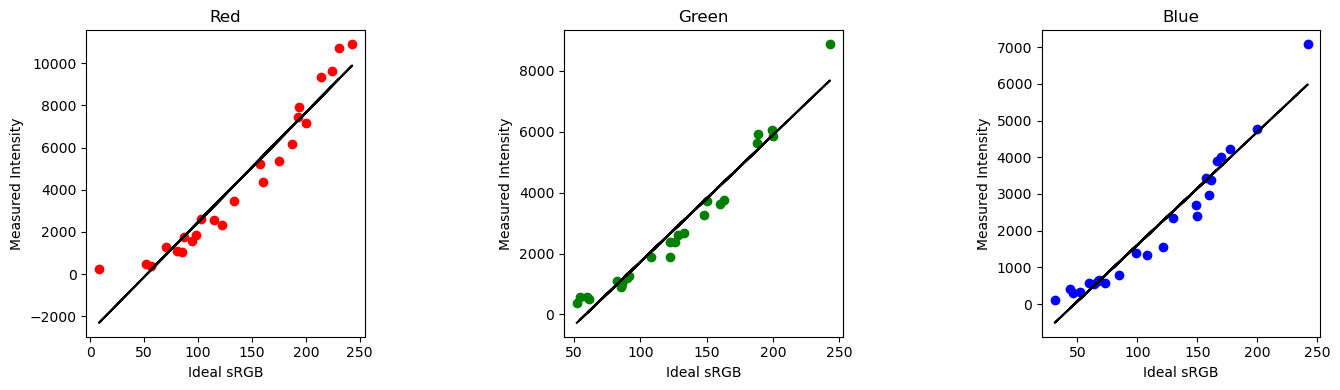

In [178]:
with rawpy.imread(img_dir + "IMG_2581.CR2") as raw:
    image_raw_orig = raw.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)

img_color = image_raw_orig
#img_color = cv2.convertScaleAbs(img_color)
print(img_color.shape, img_color.dtype)
img_color = img_color[2064:3262, 2212:4051, :]
plt.imshow(img_color)
iml = ImgLinearity(img_color)
plt.scatter(iml.target_locs[:, 0], iml.target_locs[:, 1])
iml.extract_actual(box=20)
iml.plot()

(4020, 6024, 3) uint8


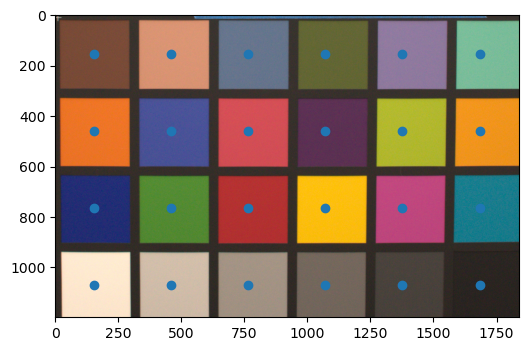

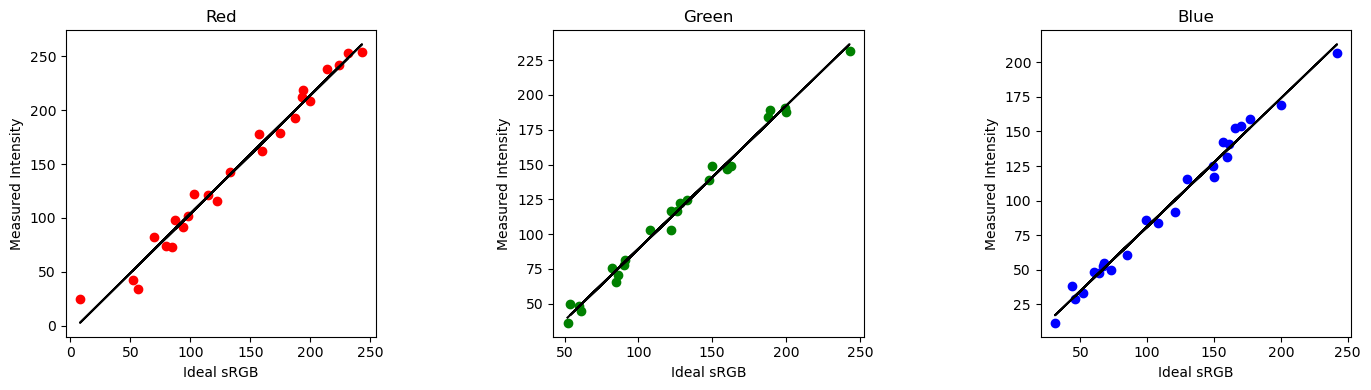

In [179]:
with rawpy.imread(img_dir + "IMG_2581.CR2") as raw:
    image_raw_orig = raw.postprocess()

img_color = image_raw_orig
print(img_color.shape, img_color.dtype)
img_color = img_color[2064:3262, 2212:4051, :]
plt.imshow(img_color)
iml = ImgLinearity(img_color)
plt.scatter(iml.target_locs[:, 0], iml.target_locs[:, 1])
iml.extract_actual(box=20)
iml.plot()